In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib nbagg

In [3]:
with open('temperature1.csv', 'r') as f:
    t_measure = [float(x.strip()) for x in f.readlines()]

<IPython.core.display.Javascript object>


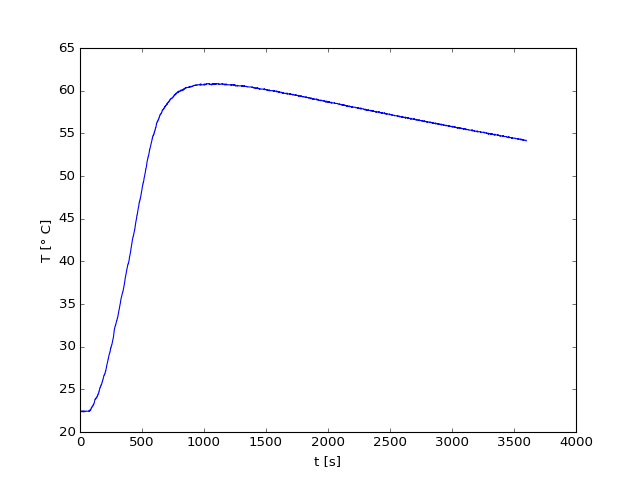

In [9]:
plt.figure()
plt.plot(t_measure)
plt.xlabel('t [s]')
plt.ylabel('T [° C]')

In [280]:
c_pw = 4200
c_ph = 400

h_w = 25
h_a = 6

m_w = 1
m_h = 0.2

T_env = 23
P = 400

rho_w = 1000
rho_h = 8800

r = 0.085

In [281]:
A_hw = np.pi * r ** 2
V_w = m_w / rho_w
H_w = V_w / A_hw
A_wa = H_w * 2 * r * np.pi + A_hw

V_h = m_h / rho_h
H_h = V_h / A_hw
A_ha = H_h * 2 * r * np.pi + A_hw

In [282]:
alpha = -(h_w * A_hw + h_a * A_ha) / (c_ph * m_h)
beta = h_w * A_hw / (c_ph * m_h)
gamma = h_w * A_hw / (c_pw * m_w)
delta = -(h_w * A_hw + h_a * A_wa) / (c_pw * m_w)

A = np.array([[alpha, beta], [gamma, delta]])
A

array([[-0.00883558,  0.00709313],
       [ 0.00013511, -0.00020115]])

In [283]:
alpha = P / (c_ph * m_h)
beta = h_a * A_ha / (c_ph * m_h) * T_env
gamma = 0
delta = h_a * A_wa / (c_pw * m_w) * T_env

B = np.array([[alpha, beta], [gamma, delta]])
B

array([[  5.00000000e+00,   4.00765218e-02],
       [  0.00000000e+00,   1.51890090e-03]])

In [284]:
u = np.array([[0, 1]]).transpose()

In [285]:
initial_state = np.array([[T_env] * 2]).transpose()

In [286]:
state = np.float64(initial_state)

In [287]:
u = np.array([[1, 1]]).transpose()

In [288]:
dt = 0.01
T1 = 522
T = 3600

In [289]:
num_steps = int(T / dt)
evolution = np.zeros((num_steps, len(state)))

In [290]:
for t in tqdm_notebook(range(int(T1 / dt))):
    d_state = (np.dot(A, state) + np.dot(B, u)) * dt
    state += d_state
    evolution[t, :] = state.transpose()

In [291]:
u = np.array([[0, 1]]).transpose()

In [292]:
for t in tqdm_notebook(range(int((T - T1) / dt))):
    d_state = (np.dot(A, state) + np.dot(B, u)) * dt
    state += d_state
    evolution[int(T1 / dt) + t, :] = state.transpose()

In [293]:
evolution[int(T1 / dt), 1], max(evolution[:, 1])

(53.443057956244466, 60.297025689974255)

<IPython.core.display.Javascript object>


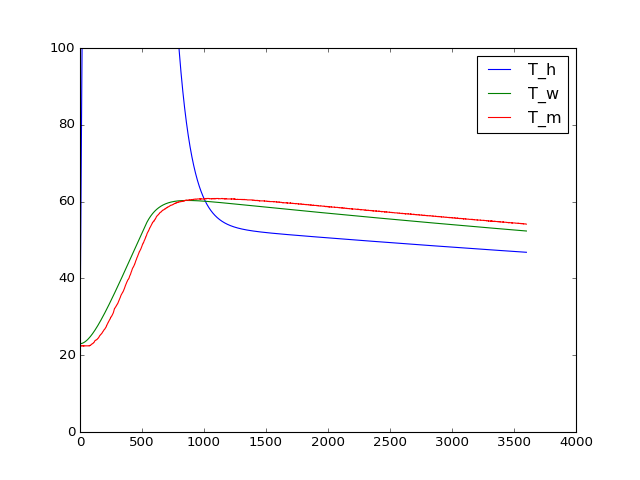

(0, 100)

In [294]:
plt.figure()
#plt.plot(evolution[:, ::] / (c_p * m_x))
plt.plot(np.arange(len(evolution)) * dt, evolution[:, ::])
plt.plot(t_measure)
plt.legend(['T_h', 'T_w', 'T_m'])
plt.ylim(0, 100)

In [295]:
evolution[:10, 0]

array([ 23.05      ,  23.09999558,  23.14998675,  23.19997349,
        23.24995583,  23.29993374,  23.34990724,  23.39987632,
        23.44984099,  23.49980125])